# EXPLORATORY DATA ANALYSIS

<div style="background-color: black|; padding: 10px; border-radius: 5px;">
    

Exploratory Data Analysis (EDA) is a critical first step before starting clustering to understand the structure, relationships, and characteristics of the dataset. Here’s how to perform EDA for clustering:

1. Data Overview: Start by examining the dataset for size, data types, and missing values. Check the number of features and samples to understand the dataset's complexity.

2. Missing Data Handling: Identify and handle missing values through imputation or removal to ensure clustering algorithms can process the data accurately.

3. Visualizations: Use pair plots, heatmaps, and scatter plots to explore relationships and clusters within the data visually.
    
    </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [ ]:
# pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\amand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Import Data


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [5]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

## Check for missing values

In [4]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


## Check Unique Value

In [6]:
# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'student_id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,


--- Counts of Unique Values (Series) ---


student_id               300
name                     297
age                        8
gender                     2
quiz1_marks               63
quiz2_marks               89
quiz3_marks               90
total_assignments          1
assignments_submitted      0
midterm_marks            156
final_marks              173
previous_gpa             171
total_lectures             1
lectures_attended         13
total_lab_sessions         1
labs_attended              7
dtype: int64

## Drop Column

In [7]:
columns_to_drop = ['student_id', 'name', 'assignments_submitted','total_assignments','total_lectures','total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


I drop because either its all the same data or its all different


## Check Data Information



In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


## Descriptive Statistics

In [9]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


In [12]:
# find unique values
unique_values_dict = {col: df_cleaned[col].unique() for col in df_cleaned.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df_cleaned.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'age': array([19, 21, 22, 23, 18, 24, 25, 20]),
 'gender': array(['Male', 'Female'], dtype=object),
 'quiz1_marks': array([ 8. , 10. ,  7.5,  5.2,  5.9,  5.8,  7.4,  6.8,  7.7,  9.1,  6. ,
         6.9,  7.2,  5.4,  7.6,  6.3,  6.6,  8.6,  5. ,  4.9,  9.3,  6.5,
         8.3,  7.9,  7.1,  4.2,  8.1,  5.5,  8.4,  5.6,  6.1,  9.9,  5.3,
         9.6,  8.7,  7. ,  3.6,  5.1,  4.4,  6.7,  5.7,  8.2,  7.8,  9.4,
         8.5,  8.9,  4.6,  2.8,  6.2,  9.8,  4.3,  3.8,  9. ,  8.8,  9.2,
         6.4,  4.8,  7.3,  9.5,  4.7,  9.7,  3.9,  4. ]),
 'quiz2_marks': array([ 5.7,  7.9,  1.2,  2.5,  6.3, 10. ,  1.1,  5.2,  1.6,  8.3,  5.5,
         8.5,  9.9,  1. ,  4.7,  8.4,  6.7,  4. ,  5.8,  6.8,  3.7,  4.6,
         7.2,  2.9,  8. ,  6.9,  3.9,  4.1,  8.1,  3.1,  8.8,  5.4,  2. ,
         7.7,  7.6,  4.4,  8.6,  2.4,  4.5,  4.3,  3. ,  3.8,  3.5,  9.8,
         6. ,  6.4,  9.4,  6.1,  7.3,  7.8,  5.9,  3.4,  6.5,  3.6,  3.3,
         4.8,  7.4,  3.2,  6.6,  4.9,  5. ,  6.2,  2.2,  5.1,  9.2,  8.


--- Counts of Unique Values (Series) ---


age                    8
gender                 2
quiz1_marks           63
quiz2_marks           89
quiz3_marks           90
midterm_marks        156
final_marks          173
previous_gpa         171
lectures_attended     13
labs_attended          7
dtype: int64

## Encoding

In [14]:
# duplicate df
df_encoded = df_cleaned.copy()
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
nominal_cols = ['gender']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.head()

{'gender': {'Female': 0, 'Male': 1}}


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,1.0,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,1.0,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,0.0,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,1.0,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,0.0,5.9,6.3,2.0,23.8,31.0,2.53,7,4


# Exploratory Data Analysis (EDA)

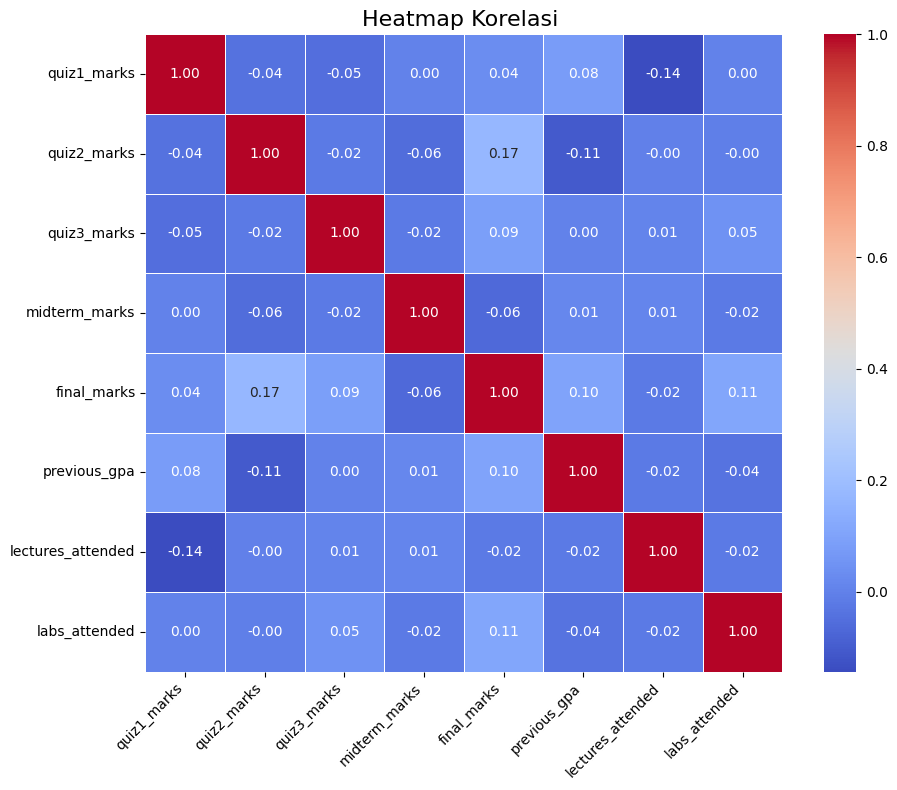

In [16]:
numerical_cols = ['quiz1_marks','quiz2_marks','quiz3_marks','midterm_marks','final_marks','previous_gpa','lectures_attended','labs_attended']
corr_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap Korelasi ', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


## Interpretation

The matrix is predominantly blue, indicating very weak correlations between almost all variables. There are no strong correlations outside of the diagonal line (where variables correlate with themselves).

- The highest correlation involving final_marks is with quiz2_marks (0.17). This is a weak positive relationship, meaning doing well on Quiz 2 slightly predicts a better final mark, but not reliably.

- The correlation is 0.10, which is very low. In this dataset, a student's previous GPA has almost no predictive power over their final exam score.

- lectures_attended has correlations near zero with almost everything (ranging from -0.14 to -0.02). This suggests that simply showing up to class (in this specific dataset) did not statistically impact grades.

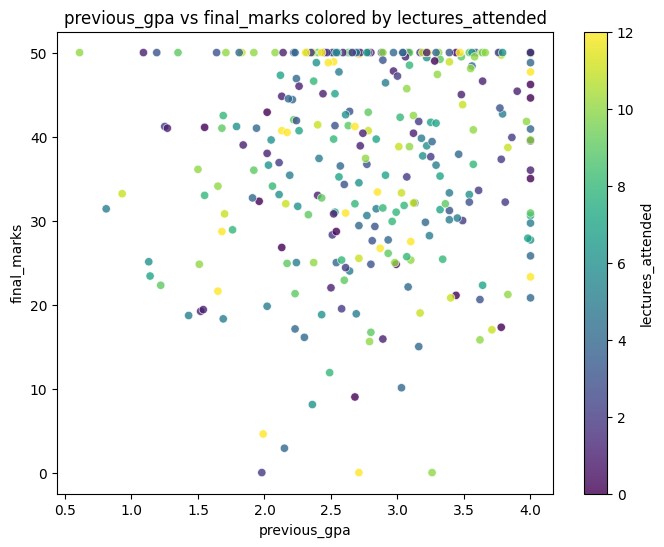

In [19]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['previous_gpa'], 
    df['final_marks'], 
    c=df['lectures_attended'], 
    cmap='viridis',
    alpha=0.8,
    edgecolors='w', 
    linewidth=0.5
)

plt.xlabel('previous_gpa')
plt.ylabel('final_marks')
plt.title('previous_gpa vs final_marks colored by lectures_attended')

cbar = plt.colorbar(scatter)
cbar.set_label('lectures_attended')

plt.show()

## Interpretation

- The points are scattered randomly across the chart. There is no clear "upward slope," confirming the low correlation (0.10) seen in the heatmap. A student with a 4.0 GPA is just as likely to get a low final mark as a student with a 2.0 GPA.

- The lack of color clustering visually confirms that attendance count is not driving the final marks in this specific dataset.

# DATA STANDARDIZATION

In [20]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
print("DataFrame after standardizing numerical columns:")
df_transformed.head()

DataFrame after standardizing numerical columns:


,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,-0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,-0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


#  PRINCIPAL COMPONENT ANALYSIS


Ref: https://statisticsglobe.com/principal-component-analysis-python

First, we should choose the ideal number of components before interpreting the results. One alternative is to conduct a PCA for all or an arbitrarily large number of components, then visualize the percentage of explained variance or the eigenvalues per component using a scree plot. Based on the graph, the optimal number can be selected. Let’s run our PCA for ten components!

In [21]:
pca = PCA(n_components=10) 

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ...,  0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ...,  0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ..., -1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ..., -2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ...,  0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ...,  0.95386868,
        -0.22568525,  0.57699358]], shape=(300, 10))

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [22]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

We will plot the scree plot using the proportion of variance explained.

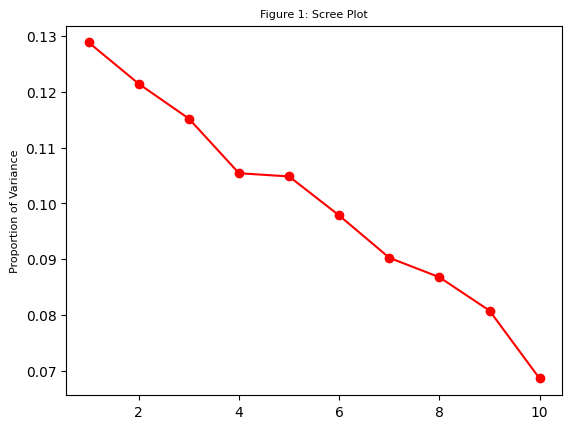

In [23]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [24]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the 7 principal components account for PC01 to PC07 = 76.37 of the variance in the data.

Since 76.37% is a considerable amount, it is sufficient to retain the 8 principal components in the analysis.

In [37]:
pca = PCA(n_components=7)
PC = pca.fit_transform(df_transformed)

Let’s store the component scores in a DataFrame and check it via the head() method!

In [39]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7'])

df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.889129,-0.150798,-0.203426,-0.105568,0.228364,0.336275,-2.017255
1,0.431347,0.988153,-1.651966,-1.133422,0.284667,1.251479,0.034210
2,1.850343,-0.167568,1.482857,-2.746648,-0.254052,-0.811114,-0.241734
3,-0.091568,-1.896952,-0.281019,1.127906,0.713257,-1.558342,-1.362312
4,-1.366585,-1.080805,0.594950,-0.608319,-0.375071,1.061232,0.755821


Now, we can form the biplot. For further information on how to do this, see Biplot in Python. Here, we will use a user-defined biplot() function for the implementation.

In [40]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


After defining our function, we just have to call it.



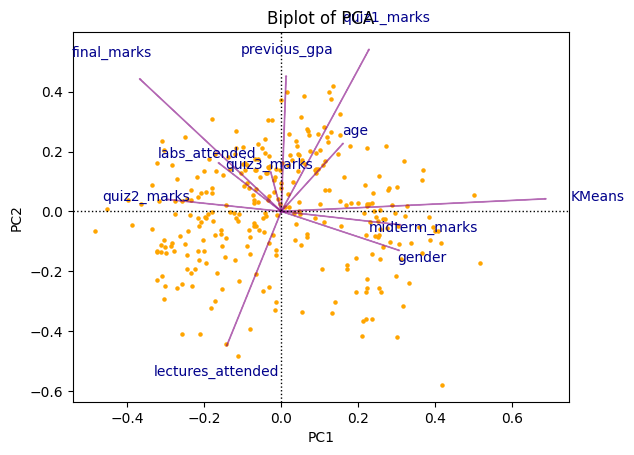

In [41]:
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

## Interpretation

PC1 (Horizontal Axis)

PC1 represent a mix of "General Academic Performance" and "Student Characteristics."

It is most strongly aligned with quiz1_marks (pointing right/up), midterm_marks (pointing right/down), and KMeans (pointing far right).

- Variables like final_marks, quiz2_marks, and labs_attended point to the left, indicating they are negatively correlated with PC1. This suggests PC1 contrasts certain assessments (Quiz 1, Midterm) against others (Finals, Quiz 2).

PC2 (Vertical Axis)

PC2 represents an "Academic Consistency vs. Attendance" dimension.

- Strongly driven by quiz1_marks, final_marks, and previous_gpa. A student high on PC2 likely has high grades across different assessment types (quizzes, finals, and GPA).

- Strongly driven by lectures_attended. This creates an interesting contrast where high grades (up) are opposing lecture attendance (down), suggesting that in this specific dataset, attending lectures does not strongly correlate with higher grades (or might even correlate negatively).

#  K-MEANS CLUSTERING

You need to decide how many clusters (K) you want to create. One way to do this is by using the elbow method, which plots the within-cluster sum of squares (WCSS) for different values of K and looks for the "elbow" point where the WCSS starts to level off.

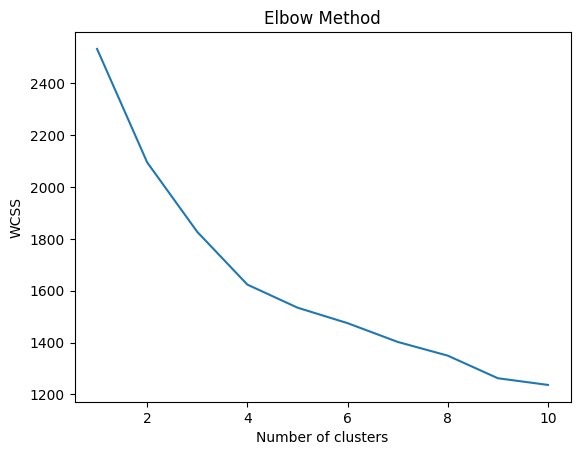

In [42]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2533.135644
1                   2  2095.334595
2                   3  1827.183435
3                   4  1623.785978
4                   5  1534.800113
5                   6  1474.995134
6                   7  1402.631965
7                   8  1349.594575
8                   9  1262.454784
9                  10  1236.682394


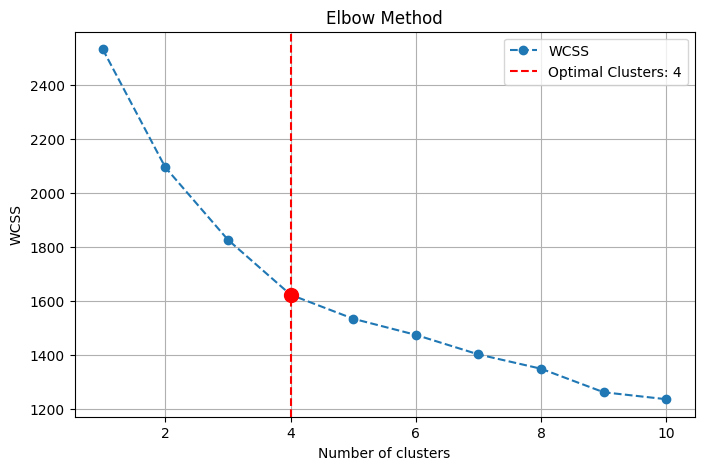

The optimal number of clusters is: 4


In [44]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


In [45]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

In [46]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.17197389385629308


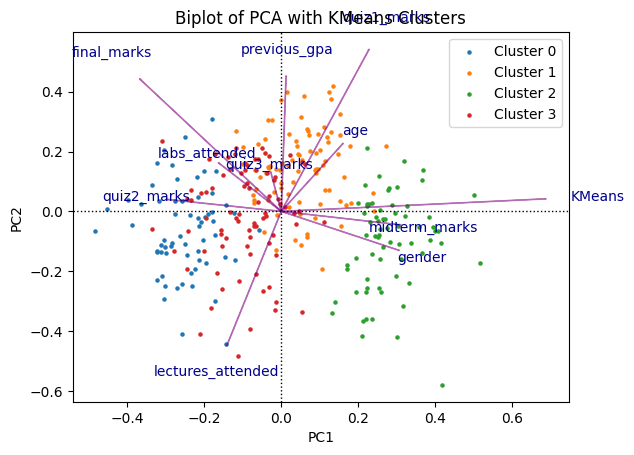

In [47]:
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [48]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,2
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,3
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,2
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,3
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0


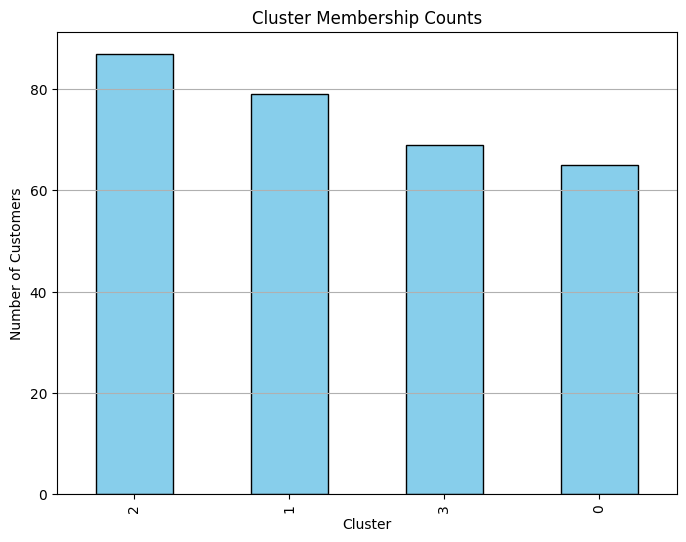

In [36]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

## Interpretation

### Cluster Profiling

#### Cluster 0 (Blue dots): 

High final marks, high lab attendance, and strong performance on Quiz 2. These students excel at the end of the term.

#### Cluster 1 (Orange dots):

High Previous GPA and older age. These are likely senior or mature students with a strong history of academic success who maintain consistent performance.

#### Cluster 2 (Green dots):

High midterm marks but low lecture attendance and low final marks. These students start the semester strong but disengage (stop attending) and perform poorly by the end.

#### Cluster 3 (Red dots): 

High lecture attendance but low previous GPA and low assessment scores. These students show up to class diligently but struggle to convert that effort into grades.

### Interpretation via PCA biplot

Cluster 0: Positioned in the direction of the final_marks and labs_attended vectors (pointing Top-Left). This confirms their grade success is driven by labs and finals.

Cluster 1: Positioned along the previous_gpa and age vectors (pointing Up/Right). Their high PC2 score reflects their historical academic strength.

Cluster 2: Positioned near the midterm_marks vector but directly opposite the final_marks vector. This highlights a disconnect: success in midterms does not guarantee success in finals for this group.

Cluster 3: Positioned along the lectures_attended vector (pointing Down-Left) but opposite to previous_gpa and final_marks. This visually demonstrates that for this specific group, high attendance is not correlating with high academic output.

### Actionable Recommendations

For Cluster 0 & 1: Create a Peer Mentoring Program. Recruit students from Clusters 0 (Finals experts) and 1 (GPA leaders) to tutor the struggling groups. This provides enrichment for the high achievers while offering support to at-risk students.

For Cluster 2: These students fade after midterms. Implement an "Early Warning System" triggered by post-midterm attendance drops. Advisors should reach out to students with high midterm scores who stop attending to prevent them from failing the final.

For Cluster 3: Since these students are already attending class but failing, mandatory attendance policies will not help. Instead, launch Study Skills Workshops or Supplemental Instruction (SI) sessions to teach them how to process the lecture material effectively.